In [40]:
import numpy as np

### Содержание<a name="1"></a>

1. [Линейная алгебра в машинном обучении](#2)
2. [Векторы. Основные понятия](#3)
3. [Базовые операции над векторами](#4)
4. [Линейная комбинация векторов](#5)
5. [Скалярное произведение векторов](#6)
6. [Практика. Векторы](#7)
7. [Матрицы. Основные понятия](#8)
8. [Базовые действия над матрицами](#9)
9. [Практика. Базовые действия над матрицами](#10)
10. [Умножение матриц](#11)
11. [Умножение на специальные матрицы](#12)
12. [Делители нуля](#13)
13. [Умножение и транспонирование матриц](#14)
14. [Практика. Умножение матриц](#15)
15. [Обратная матрица](#16)
16. [Определитель матрицы](#17)
17. [Линейная (не)зависимость](#18)
18. [Практика. Обратная матрица, ранг, определитель](#19)

---

### Линейная алгебра в машинном обучении<a name="2"></a>

__Корреляционная матрица__

_Определение_:  Корреляция — это количественная мера, используемая для изучения отношений между двумя непрерывными переменными.

Корреляция указывает направление линейных отношений между переменными. Положительная корреляция указывает, что увеличение или уменьшение одной переменной сопровождается тем же самым в другой переменной. Отрицательная корреляция указывает на противоположность переменных.

__Уменьшение размерности__

Нам нужно уменьшить количество переменных, чтобы выполнить какой-либо реальный анализ. Это и есть уменьшение размерности нашего признакового пространства.  А каждый признак, как всем известно, — вектор!

__Свёртка и обработка изображений__

Вы, наверное, знаете, что современные компьютеры рассчитаны на обработку только 0 и 1. Так, как же в компьютере можно сохранить изображение, с несколькими атрибутами, такими как цвет? Это достижимо путём сохранения интенсивности пикселей в конструкции под названием матрица. Затем эта матрица может быть обработана для определения цветов, предметов и т.д.

Поэтому любая операция, которую вы хотите выполнить с этим изображением, вероятно, будет использовать линейную алгебру и матрицы под капотом.

__Вложение слов__

_Определение_:  Вложение слов — это способ представления слов в качестве низкоразмерных векторов чисел при сохранении их контекста в документе.

Эти представления получены путем обучения различных нейронных сетей на большом объёме текста, который называется __корпусом__. Они также помогают в анализе синтаксического сходства между словами.

[К содержанию](#1)

---

### Векторы. Основные понятия<a name="3"></a>

__Что такое вектор?__

_Определение_: **Вектор** — это набор чисел, записанных в определённом порядке (в столбик или в строчку).

__Основные характеристики вектора__

К основным характеристикам вектора относятся его **координаты** и **размерность**.  

_Определение_: **Координаты вектора** — это числа, из которых он состоит.  

_Определение_: **Размерность вектора** — это количество координат.

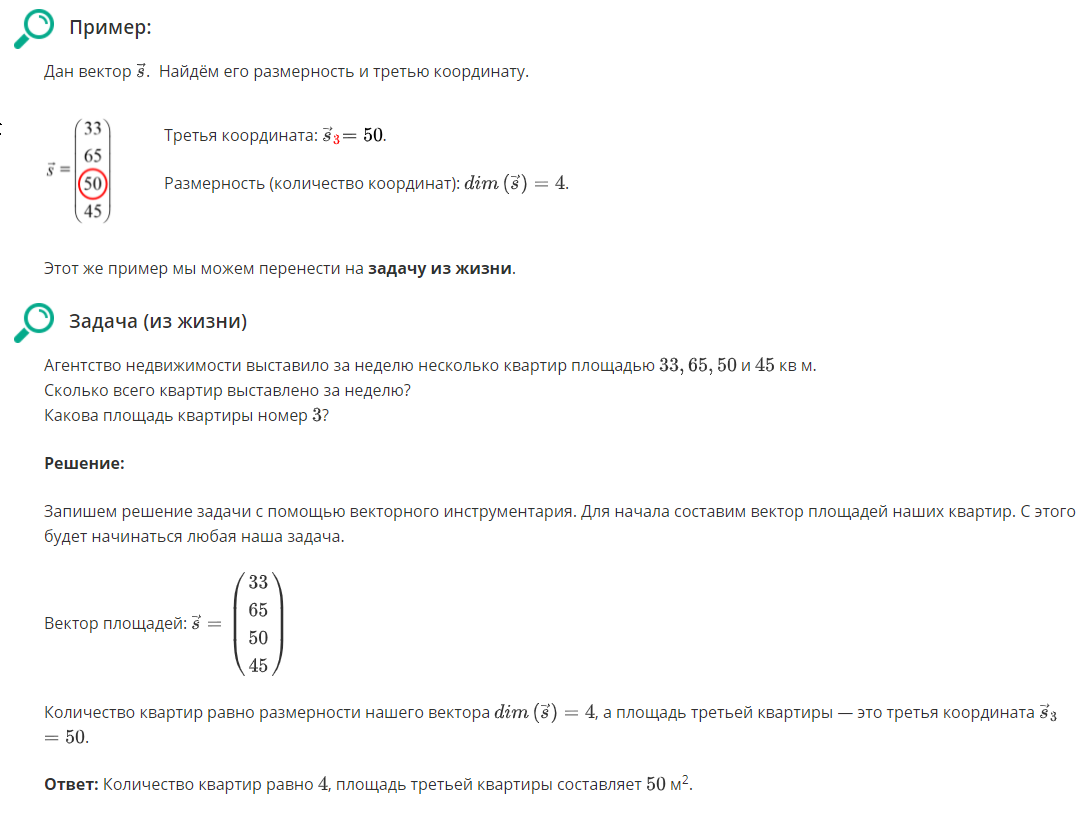

__Задача (Python)__

1. Задаем вектор

In [41]:
s = np.array([33, 65, 50, 45])
s

array([33, 65, 50, 45])

2. Ищем третью координату
* В Python массивы нумеруются с нуля, а не с единицы, поэтому для третьей квартиры нужен элемент массива с номером 2

In [42]:
s[2]

50

3. Находим размерность (__len__)

In [43]:
len(s)

4

__Практика__

На рынке новостроек появилось предложение от застройщика "Гарантия" — двухкомнатная квартира общей площадью 59.50 кв.м, жилой площадью 31.40 кв.м на 19-м этаже 22-х этажного дома. В доме 1 подъезда. Цена за квадратный метр квартиры у этого застройщика составляет 60550 рублей.

In [44]:
x = np.array([59.50, 31.40, 19, 22, 60550, 2])

In [45]:
# В NumPy вектор и массив - одно и то же.
# Исключение - понятие вектор-столбец и вектор-строка - фактически двумерные массивы,
# где один из атрибутов shape равен 1.

print("ndim:", x.ndim)  # число осей (измерений) массива - n.dim: 1
# размеры массива, для вектора определена только длина - shape: (6, )
print("shape:", x.shape)

ndim: 1
shape: (6,)


1. Задаем вектор

In [46]:
apartment = np.array([59.50, 31.40, 19, 22, 60550, 2])

2. Скоращаем веторное пространство, сгенерив новый признак

In [47]:
share_living_space = apartment[1]/apartment[0]

3. Избавляемся от старых признаков

In [48]:
apartment = np.delete(apartment, [0, 1])

4. Добавляем новый признак

In [49]:
apartment = np.append(apartment, share_living_space)

__Задания__

1. Значение получившегося нового признака share_living_space

In [50]:
apartment[4]

0.5277310924369748

2. Размерность конечного массива

In [51]:
len(apartment)

5

[К содержанию](#1)

---

### Базовые операции над векторами<a name="4"></a>

__Сложение векторов__

Сложение векторов происходит поэлементно, первая координата складывается с первой, вторая со второй и так далее. Вычитаются векторы так же поэлементно.

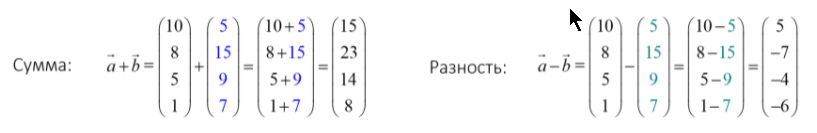

In [52]:
a = np.array([10, 8, 5, 1])
b = np.array([5, 15, 9, 7])

In [53]:
a+b

array([15, 23, 14,  8])

In [54]:
a-b

array([ 5, -7, -4, -6])

__Умножение вектора на число__

Умножение вектора на число также происходит поэлементно, то есть каждая координата вектора умножается на заданное число.

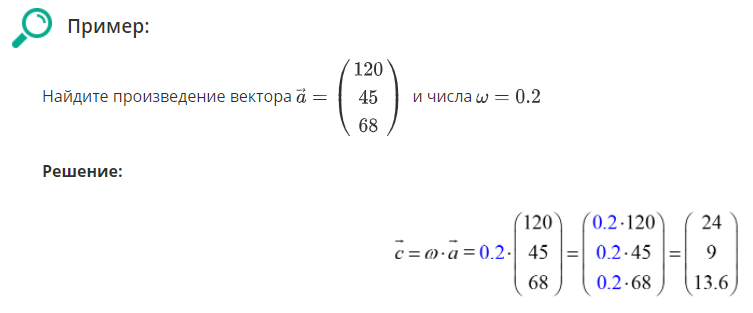

Векторы __a__ и __c__ пропорциональны друг другу с коэффициентом __0.2__. Такие векторы также называют __коллинеарными__.

Если коэффициент пропорциональности положительный, векторы сонаправлены, если отрицательный — противоположно направлены. Геометрически это значит, что векторы лежат на одной прямой (или параллельных прямых) и направлены в одну или противоположные стороны.

In [55]:
a = np.array([120, 45, 68])
omega = 0.2

In [56]:
a

array([120,  45,  68])

In [57]:
omega

0.2

In [58]:
omega*a

array([24. ,  9. , 13.6])

__Сложение векторов и умножение на число: особые случаи__

1.  Сложение противоположных векторов:

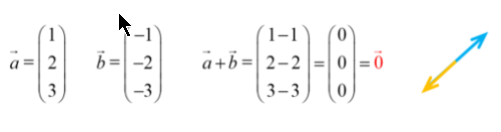

2. Умножение вектора на ноль:

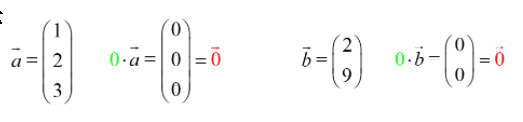

3. Умножение на нулевой вектор:

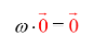

__Задания__

Задание 1

In [59]:
x = np.array([5, 2])
y = np.array([-5, -11])

Сумма векторов

In [60]:
x+y

array([ 0, -9])

Разность векторов

In [61]:
x-y

array([10, 13])

Задание 2

In [62]:
a = np.array([120, 150, 90])
b = np.array([130, 130, 130])
c = np.array([2, 3, 2.5])

In [63]:
c = c*72
c

array([144., 216., 180.])

In [64]:
a+b+c

array([394., 496., 400.])

[К содержанию](#1)

---

### Линейная комбинация векторов<a name="5"></a>

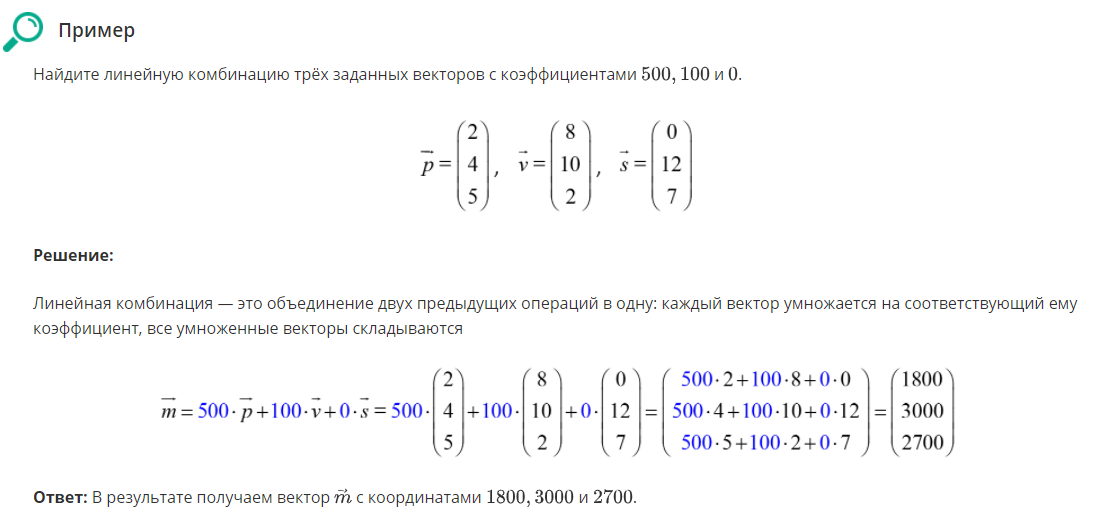

*Определение*: __Линейная комбинация__ — это сумма векторов, умноженных на некоторые числа. 

In [65]:
p = np.array([2, 4, 5])
v = np.array([8, 10, 2])
s = np.array([0, 12, 7])

In [66]:
500*p+100*v+0*s

array([1800, 3000, 2700])

__Нулевая линейная комбинация__

*Определение*: Линейная комбинация называется __тривиальной__, если все коэффициенты равны нулю.

*Определение*: Линейная комбинация называется __нетривиальной__, если хотя бы один из коэффициентов не равен нулю.

*Определение*: Векторы называются __линейно зависимыми__, если существует нулевая нетривиальная комбинация этих векторов. 

*Определение*: Векторы называются __линейно независимыми__, если не существует нулевой нетривиальной комбинации этих векторов.

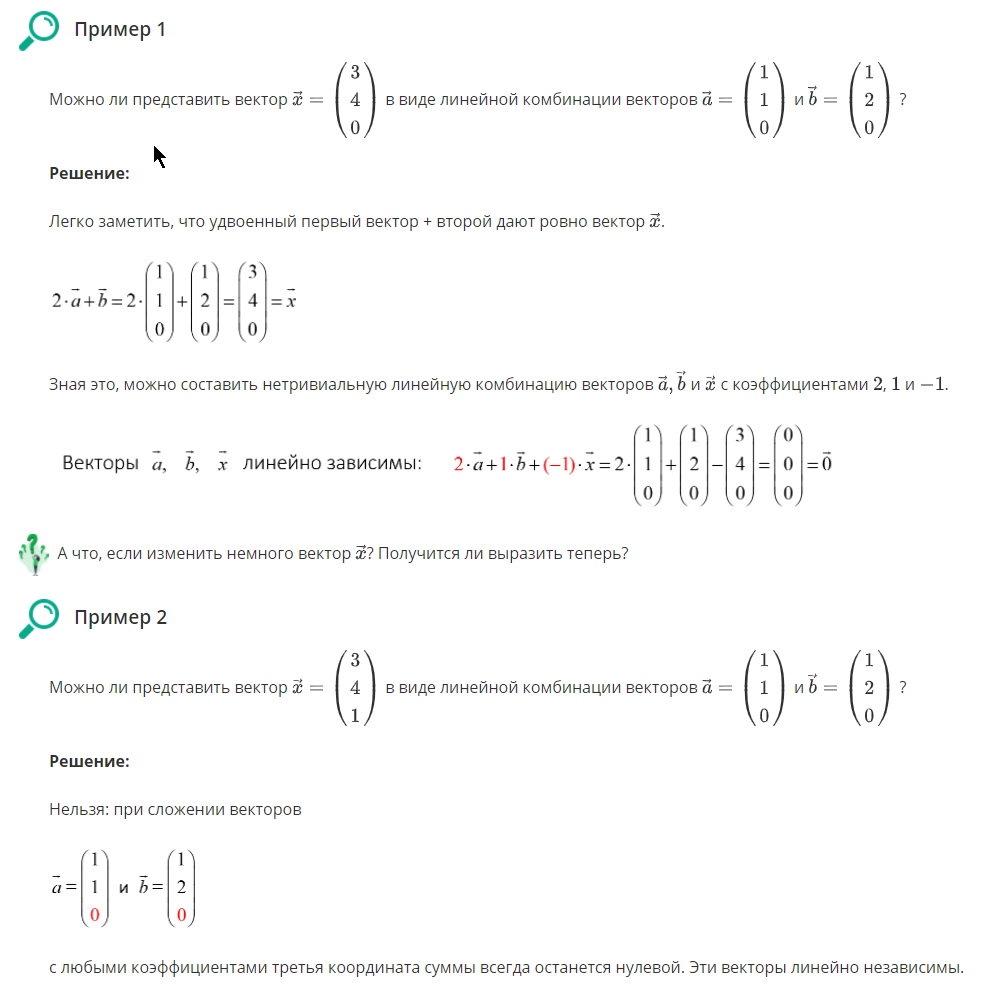

__Задания__

Задание 1

In [67]:
x = np.array([4, 5])
y = np.array([2, 1])
u = np.array([1, 0])

In [68]:
2*x+(-3)*y+5*u

array([7, 7])

Задание 2

In [69]:
x = np.array([3, 4, 5, 9])
y = np.array([1, 5, 3, 6])

In [70]:
(-200)*x+400*y

array([-200, 1200,  200,  600])

[К содержанию](#1)

---

### Скалярное произведение векторов<a name="6"></a>

__Четыре основных способа умножить векторы__

1. *Скалярное произведение*. Результат — число. 
2. *Векторное произведение*. Результат — вектор.
3. *Смешанное произведение*. Результат — число. 
4. *Тензорное произведение*. Результат — матрица.

> **Чтобы найти скалярное произведение двух векторов**, необходимо перемножить их координаты с одинаковыми номерами и сложить то, что получится. 

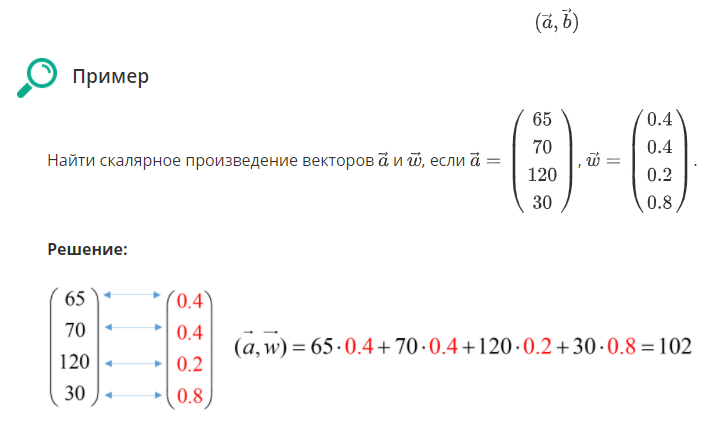

In [71]:
a = np.array([65, 70, 120, 30])
w = np.array([0.4, 0.4, 0.2, 0.8])

In [72]:
np.dot(a,w)

102.0

__Длина вектора__

> **Длина вектора вычисляется** как квадратный корень из скалярного произведения вектора с самим собой. Для нас это просто корень из суммы квадратов координат, как в теореме Пифагора — для случая с размерностью вектора равной двум (геометрически это длина отрезка).

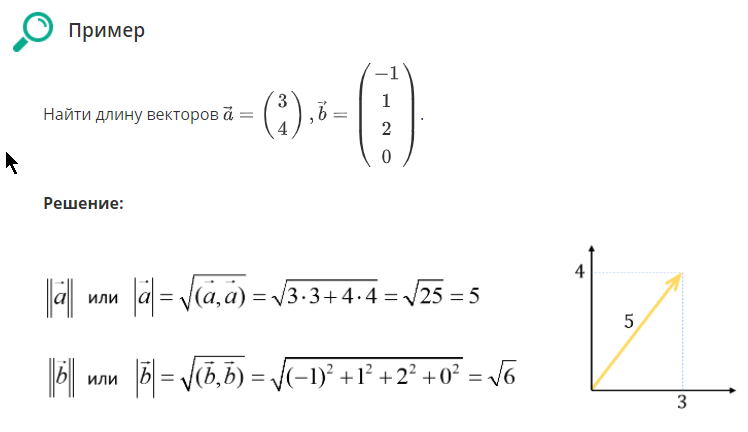

Длина вектора всегда неотрицательна и показывает, как близок вектор к нулевому.

__Свойство скалярного произведения векторов (линейность)__

Правило раскрытия скобок при умножении чисел:

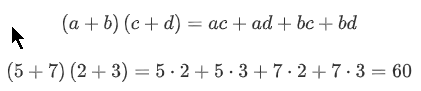

> Скалярное произведение ведёт себя точно так же, по тому же принципу можно раскрывать скобки, а также выносить числовые множители:

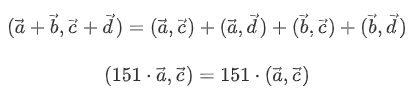

__Особый случай. Ортогональность векторов__

*Определение*: Векторы называются __ортогональными__, если их скалярное произведение равно нулю.

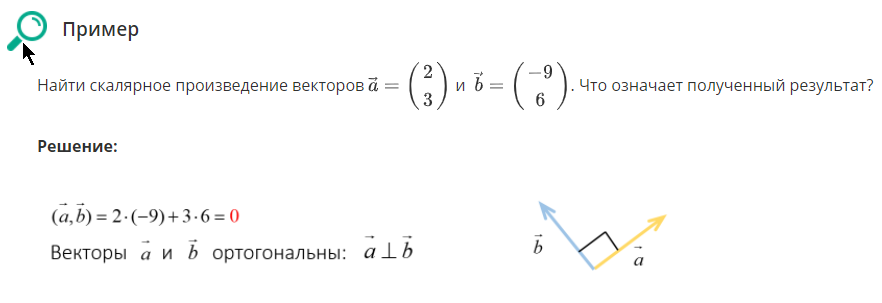

__Задания__

Задание 1

In [73]:
x = np.array([4, 5, -1])
y = np.array([2, 0, 1])

In [74]:
np.dot(x,y)

7

Задание 2

In [75]:
x = np.array([4, 6, 1])

In [76]:
np.sqrt(np.dot(x,x))

7.280109889280518

Задание 3

In [77]:
x = np.array([4, 2, -1])
y = np.array([2, 0, 1])

In [78]:
np.dot(x,y)

7

In [79]:
x = np.array([4, 2, -1])
y = np.array([0, 0, 0])

In [80]:
np.dot(x,y)

0

In [81]:
x = np.array([4, -1])
y = np.array([-1, 4])

In [82]:
np.dot(x,y)

-8

In [83]:
x = np.array([4, -1])
y = np.array([1, 4])

In [84]:
np.dot(x,y)

0

[К содержанию](#1)

---

### Практика. Векторы<a name="7"></a>

__Нормирование вектора__ — это получение вектора с тем же направлением, что и исходный, но нормой 1.  

__Норма__ вектора вычисляется как корень из суммы квадратов его компонент. Её физический смысл: норма показывает, насколько вектор «большой».  

Длина вектора (в физическом смысле) — это то же, что и норма, применимо к векторам в реальном пространстве.

> Нормирование производится делением вектора на его норму.

__Скринкаст__

In [85]:
# как создать вектор?

In [86]:
# как одномерный массив numpy
a=np.array([1,2,3])
print(a, type(a))

[1 2 3] <class 'numpy.ndarray'>


In [87]:
np.array([1,2,3], dtype='float')

array([1., 2., 3.])

In [88]:
# преобразовать из списка (list)
x=[1,2,3]
x_arr=np.array(x)
print(x, type(x))
print(x_arr, type(x_arr))

[1, 2, 3] <class 'list'>
[1 2 3] <class 'numpy.ndarray'>


In [89]:
# нулевой вектор
np.zeros(5) 

array([0., 0., 0., 0., 0.])

In [90]:
# вектор из единиц
np.ones(8)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [91]:
# массив чисел по порядку
np.arange(10,50, 5)

array([10, 15, 20, 25, 30, 35, 40, 45])

In [92]:
# случайный вектор
np.random.randint(-4, 2, 10) # dim=10, случаные целые числа от -4 до 2

array([-1,  1,  1,  1, -3, -1,  0, -4,  1, -1])

In [93]:
# преобразовать из Pandas Series
import pandas as pd
data = [65, 70, 120, 35]
s = pd.Series(data)
print('Series:\n',s)

Series:
 0     65
1     70
2    120
3     35
dtype: int64


In [94]:
x = s.values # возвращает значения s
print('vector:\n',x)
print('type of x:',type(x))

vector:
 [ 65  70 120  35]
type of x: <class 'numpy.ndarray'>


In [95]:
# преобразовать из Pandas DataFrame
d = {'$$': [65, 70, 120, 35], '2.Area': [50, 52, 80, 33],'3.Rooms':[3,2,1,1], 
     '4.Floor':[5,12,10,3], '5.Demo':[8,4,5,10]}
df = pd.DataFrame(d)
print('Data Frame:\n',df)

Data Frame:
     $$  2.Area  3.Rooms  4.Floor  5.Demo
0   65      50        3        5       8
1   70      52        2       12       4
2  120      80        1       10       5
3   35      33        1        3      10


In [96]:
A = df.values # возвращает значения df
print('Matrix:\n',A)

Matrix:
 [[ 65  50   3   5   8]
 [ 70  52   2  12   4]
 [120  80   1  10   5]
 [ 35  33   1   3  10]]


In [97]:
x=A[1] # вторая строка матрицы А
print('Second apartment vector:\n',x)
print('type of x:',type(x))

Second apartment vector:
 [70 52  2 12  4]
type of x: <class 'numpy.ndarray'>


In [98]:
y=A[:,0] # первый столбец матрицы А
print('$$ vector:\n',y)

$$ vector:
 [ 65  70 120  35]


In [99]:
# индексация векторов - поиск нужной координаты
print('$$ of 3 apartment:',y[2]) # третья координата

$$ of 3 apartment: 120


In [100]:
# размерность вектора
print('Number of apartments = dim(y):', len(y))

Number of apartments = dim(y): 4


In [101]:
# сумма векторов и умножение на число
a=np.array([1,2,3])
b=np.array([6,7,8])
print('a+b:',a+b)
print('2a:',2*a)

a+b: [ 7  9 11]
2a: [2 4 6]


In [102]:
# сумма списков и умножение на число не является векторной операцией!
a_list=[1,2,3]
b_list=[6,7,8]
print('a+b:',a_list+b_list)
print('2a:',2*a_list)

a+b: [1, 2, 3, 6, 7, 8]
2a: [1, 2, 3, 1, 2, 3]


In [103]:
# линейная комбинация с коэффициентами 2, 2, 3
a=np.array([1,2,3])
b=np.array([6,7,8])
c=np.array([1,0,1])

d=2*a+2*b+3*c
print('linear combination:',d)

linear combination: [17 18 25]


In [104]:
# скалярное произведение

s=np.dot(a,b)
print('scalar product:',s)

# покоординатное умножение
print('coordinate product:',a*b)

scalar product: 44
coordinate product: [ 6 14 24]


In [105]:
# скалярное произведение - еще один способ
s1=a@b
print('scalar product:',s1)

scalar product: 44


In [106]:
# длина вектора
l=np.linalg.norm(a)
print('length of a:',l)

length of a: 3.7416573867739413


In [107]:
# нормировка
a_norm=a/np.linalg.norm(a)
print('a_norm:',a_norm)
print('length of a_norm:',np.linalg.norm(a_norm))

a_norm: [0.26726124 0.53452248 0.80178373]
length of a_norm: 1.0


In [108]:
#пропорциональность и ортогональность
a=np.array([1,2,1])
b=a*2
c=np.array([-1,1,-1])
print('a:',a)
print('b:',b)
print('c:',c)

a: [1 2 1]
b: [2 4 2]
c: [-1  1 -1]


In [109]:
#пропорциональность и ортогональность
print("(a,b):",np.dot(a,b))
print("(a,c):",np.dot(a,c))
print("(b,c):",np.dot(b,c))

(a,b): 12
(a,c): 0
(b,c): 0


In [110]:
# попарная ортогональность - да
a=np.array([1,0,1])
b=np.array([0,1,0])
c=np.array([1,0,-1])
print('a:',a)
print('b:',b)
print('c:',c)

a: [1 0 1]
b: [0 1 0]
c: [ 1  0 -1]


In [111]:
# попарная ортогональность - да
print('(a,b):',np.dot(a,b))
print('(b,c):',np.dot(b,c))
print('(a,c):',np.dot(a,c))

(a,b): 0
(b,c): 0
(a,c): 0


In [112]:
# попарная ортогональность - нет
c1=np.array([1,0,4])
print('a:',a)
print('b:',b)
print('с1:',c1)

a: [1 0 1]
b: [0 1 0]
с1: [1 0 4]


In [113]:
# попарная ортогональность - нет
print('(a,b):',a@b)
print('(b,c1):',b@c1)
print('(a,c1):',a@c1)

(a,b): 0
(b,c1): 0
(a,c1): 5


__Задания__

> *Задача 1*

По строкам расположены квартиры, по столбцам — параметры: арендная плата, общая площадь, количество комнат, этаж, количество показов на две недели и жилая площадь:

In [114]:
Hut_Paradise_DF = pd.DataFrame({'1.Rent': [65, 70, 120, 35, 40, 50, 100, 90, 85], 
                                '2.Area': [50, 52, 80, 33, 33, 44, 80, 65, 65], 
                                '3.Rooms':[3, 2, 1, 1, 1, 2, 4, 3, 2],
                                '4.Floor':[5, 12, 10, 3, 6, 13, 8, 21, 5], 
                                '5.Demo two weeks':[8, 4, 5, 10, 20, 12, 5, 1, 10], 
                                '6.Liv.Area': [37, 40, 65, 20, 16, 35, 60, 50, 40]})

In [115]:
Hut_Paradise_DF

,1.Rent,2.Area,3.Rooms,4.Floor,5.Demo two weeks,6.Liv.Area
0,65,50,3,5,8,37
1,70,52,2,12,4,40
2,120,80,1,10,5,65
3,35,33,1,3,10,20
4,40,33,1,6,20,16
5,50,44,2,13,12,35
6,100,80,4,8,5,60
7,90,65,3,21,1,50
8,85,65,2,5,10,40


In [116]:
df_matrix = Hut_Paradise_DF.values

In [117]:
df_matrix

array([[ 65,  50,   3,   5,   8,  37],
       [ 70,  52,   2,  12,   4,  40],
       [120,  80,   1,  10,   5,  65],
       [ 35,  33,   1,   3,  10,  20],
       [ 40,  33,   1,   6,  20,  16],
       [ 50,  44,   2,  13,  12,  35],
       [100,  80,   4,   8,   5,  60],
       [ 90,  65,   3,  21,   1,  50],
       [ 85,  65,   2,   5,  10,  40]], dtype=int64)

Найдите вектор параметров квартиры номер 5:

In [118]:
df_matrix[4]

array([40, 33,  1,  6, 20, 16], dtype=int64)

Найдите вектор этажей всех квартир:

In [119]:
df_matrix[:, 3]

array([ 5, 12, 10,  3,  6, 13,  8, 21,  5], dtype=int64)

На каком этаже расположена квартира номер 3?

In [120]:
df_matrix[2, 3]

10

Найдите количество квартир:

In [121]:
df_matrix.shape[0]

9

Вычислите вектор нежилой площади:

In [122]:
no_liv = df_matrix[:, 1]-df_matrix[:, 5]
no_liv

array([13, 12, 15, 13, 17,  9, 20, 15, 25], dtype=int64)

Арендная плата измеряется в тысячах рублей. Пересчитайте стоимость аренды каждой квартиры в тысячах гривен, если курс 10 руб = 4 гривны:

In [123]:
omega = 0.4

In [124]:
df_matrix[:, 0]*omega

array([26., 28., 48., 14., 16., 20., 40., 36., 34.])

Пусть в первой квартире один просмотр занимает 10 минут, во второй — 20 минут, в третьей — полчаса, в четверой — 15 минут, в пятой — 5 минут, в шестой — 40 минут, в седьмой — 20 минут, в восьмой — 8 минут и в девятой — 20 минут. Найдите продолжительность просмотров в минутах во всех квартирах за 2 недели:

In [125]:
p = np.array([10,20,30,15,5,40,20,8,20])

In [126]:
df_matrix[:, 4]@p

1348

> *Задача 2*

Проверьте, являются ли векторы попарно ортогональными.

In [127]:
u=np.array([3,0,1,1,1])
v=np.array([0,1,0,2,-2])
w=np.array([1,-4,-1,0,-2])

Составьте линейную комбинацию векторов v и w с коэффициентами 2 и -3:

In [128]:
x = 2*v+(-3)*w
x

array([-3, 14,  3,  4,  2])

Будет ли эта комбинация ортогональна вектору u?

In [129]:
x@u

0

Нормируйте векторы u, v, w.

In [130]:
u_norm=u/np.linalg.norm(u)
v_norm=v/np.linalg.norm(v)
w_norm=w/np.linalg.norm(w)

In [131]:
round(u_norm[2],3)

0.289

In [132]:
round(v_norm[3], 3)

0.667

In [133]:
round(w_norm[0], 3)

0.213

[К содержанию](#1)

---

### Матрицы. Основные понятия<a name="8"></a>

*Определение*: __Матрица__ представляет собой набор чисел, расположенных по строкам и столбцам, как в таблице.

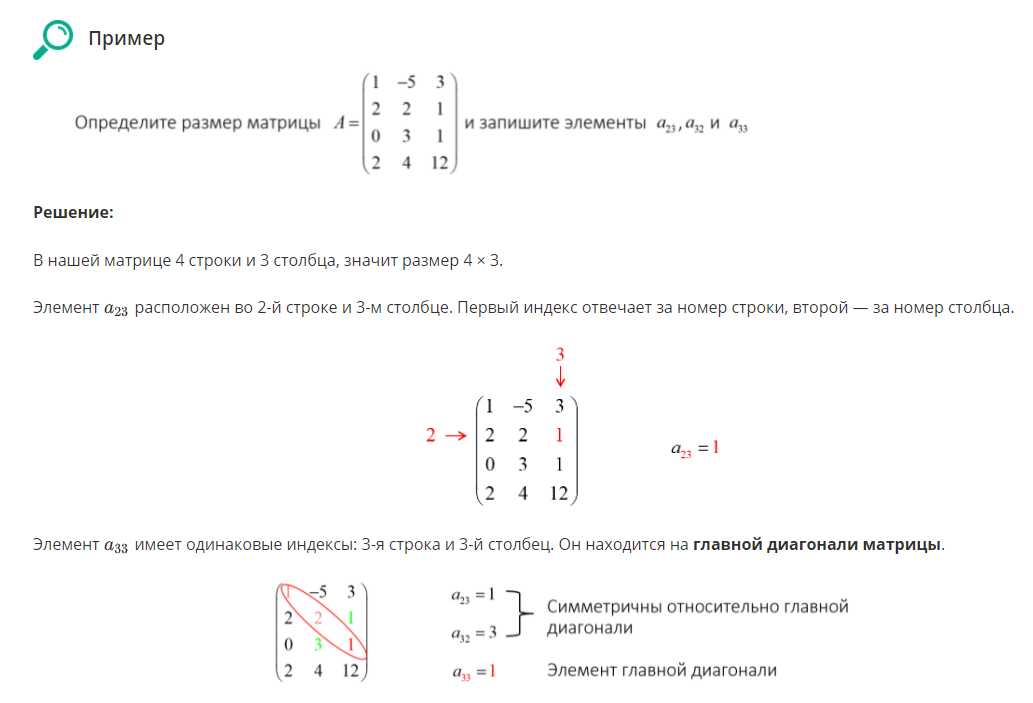

Создание матрицы

In [134]:
A=np.array([[1,-5,3],[2,2,1],[0,3,1],[2,4,12]])
A

array([[ 1, -5,  3],
       [ 2,  2,  1],
       [ 0,  3,  1],
       [ 2,  4, 12]])

Размер матрицы

In [135]:
A.shape

(4, 3)

Поиск элементов

In [136]:
print('a_23 =', A[1,2], 'a_32 =', A[2,1], 'a_33 =', A[2,2])

a_23 = 1 a_32 = 3 a_33 = 1


__Виды матрицы по форме__

1. Прямоугольные

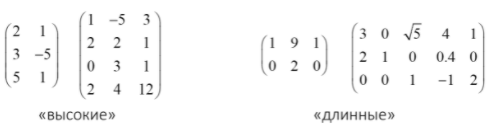

2. Квадратные

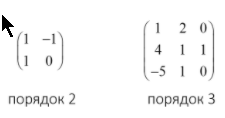

3. Вектор-столбец (частный случай)

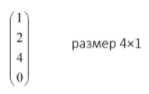

4. Вектор-строка (частный случай)

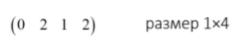

__Виды матриц по содержанию__

1. Нулевая матрица

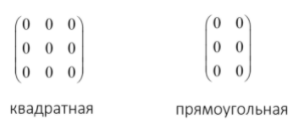

2. Матрица единиц

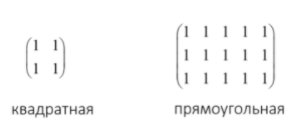

3. Треугольная (квадратная)

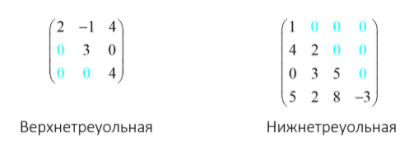

4.  Симметричная (квадратная)

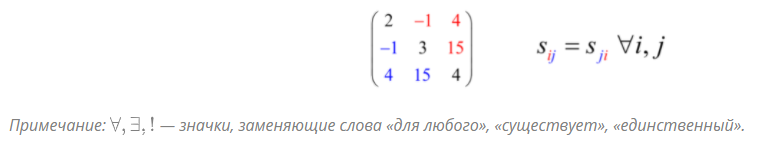

5. Диагональная (квадратная)

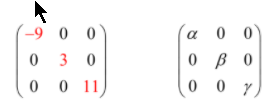

6. Cкалярная или шаровая (квадратная)

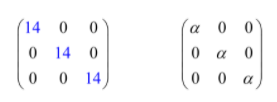

7. Единичная матрица (квадратная)

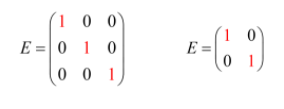

[К содержанию](#1)

---

### Базовые действия над матрицами<a name="9"></a>

__Сложение матриц__

Матрицы складываются и вычитаются поэлементно. Складывать и вычитать можно только матрицы __одинакового размера__.

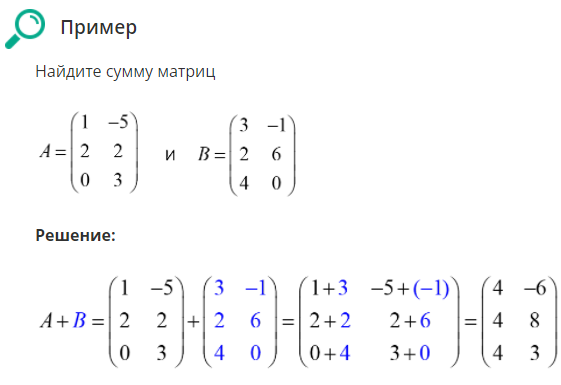

__Умножение матрицы на число__

Умножение матрицы на скаляр снова аналогично векторной операции. Числовые множители также можно выносить из матрицы.

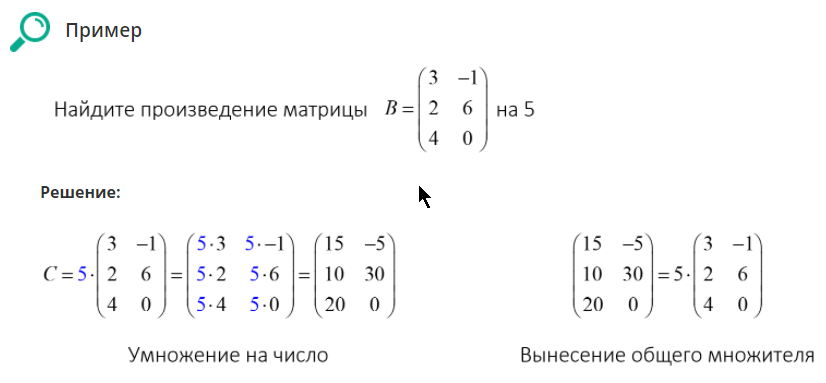

__Транспонирование матриц__

При транспонировании строки матрицы записываются в столбцы и матрица переворачивается.

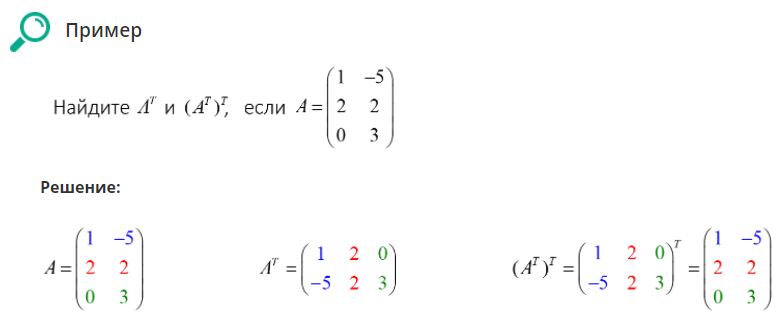

Частный случай: __транспонирование векторов__. Если транспонировать вектор-столбец, получится вектор-строка и наоборот.

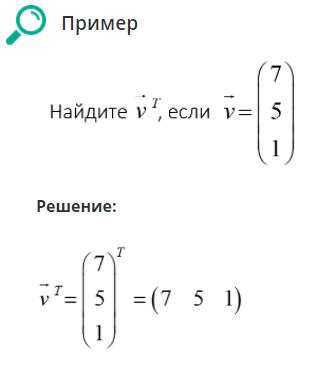

__T в Python__

Для операции транспонирования в питоне есть команда, которая обозначается __Т__. *Python* не умеет транспонировать одномерные массивы.

In [137]:
A = np.matrix('1,-5;2,2;0,3')
v = np.array([7,5,1])

In [138]:
A

matrix([[ 1, -5],
        [ 2,  2],
        [ 0,  3]])

In [139]:
A.T

matrix([[ 1,  2,  0],
        [-5,  2,  3]])

In [140]:
v

array([7, 5, 1])

In [141]:
v.T

array([7, 5, 1])

__Транспонирование симметричных матриц__

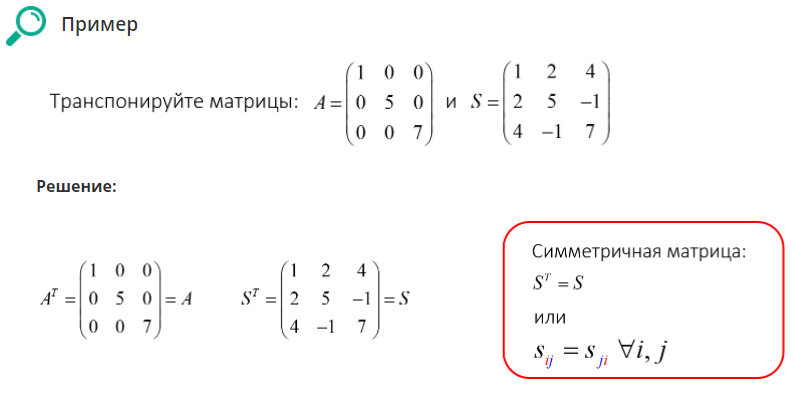

__Резюме__

* Матрицы складываются и вычитаются поэлементно.  
_Результат — матрица того же размера._
* Матрицы умножаются на число поэлементно.  
_Результат — матрица того же размера._
* При транспонировании строки превращаются в столбцы.  
_Размер прямоугольной матрицы меняется._
* Инварианты транспонирования: симметричные матрицы.

__Задания__

> _Задание 1_

Найдите сумму матриц

In [142]:
A = np.matrix('1,1;5,7')
B = np.matrix('6,1;-5,5')

In [143]:
A+B

matrix([[ 7,  2],
        [ 0, 12]])

> _Задание 2_

Транспонируйте матрицу

In [144]:
R = np.matrix('1,5,4;0,1,0')

In [145]:
R.T

matrix([[1, 0],
        [5, 1],
        [4, 0]])

[К содержанию](#1)

---

### Практика. Базовые действия над матрицами<a name="10"></a>

In [146]:
# как создать матрицу?

In [147]:
# как двумерный массив Numpy
np.array( [ [1,1] , [2,3] , [4,5] ] )

array([[1, 1],
       [2, 3],
       [4, 5]])

In [148]:
# преобразовать из Pandas DataFrame
import pandas as pd

data=[[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
df = pd.DataFrame(data)

A = df.values

print('Data Frame:')
print(df)
print('Matrix:')
print(A)

Data Frame:
    0   1   2
0   1   2   3
1   4   5   6
2   7   8   9
3  10  11  12
Matrix:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [149]:
# размер матрицы
np.shape(A)

(4, 3)

In [150]:
# вектор-столбец
x=np.array([1,2,3])
np.reshape(x,(3,1))

array([[1],
       [2],
       [3]])

In [151]:
# вектор-строка
np.reshape(x,(1,3))

array([[1, 2, 3]])

In [152]:
# вектор-строка
x_row=np.array([1, 2, 3], ndmin=2)
print(x_row,np.shape(x_row))

[[1 2 3]] (1, 3)


In [153]:
# индексация матриц (двумерных массивов numpy)
print('матрица А:')
print(A)
print('Первая строка матрицы А:')
print(A[0])
print('Третий столбец матрицы А:')
print(A[:,2])
print('Элемент а_43:')
print(A[3,2])

матрица А:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Первая строка матрицы А:
[1 2 3]
Третий столбец матрицы А:
[ 3  6  9 12]
Элемент а_43:
12


In [154]:
# создание специальных матриц

In [155]:
# нулевая
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [156]:
# единичная
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [157]:
# матрица единиц
np.ones((3,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [158]:
# Диагональная
diagonal=[1,2,3]
np.diag(diagonal)

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [159]:
# Шаровая
5*np.eye(3)

array([[5., 0., 0.],
       [0., 5., 0.],
       [0., 0., 5.]])

In [160]:
A=np.array([[1,1],[2,3],[4,5]])
B=np.array([[1,-1],[-2,3],[4,-5]])

In [161]:
A

array([[1, 1],
       [2, 3],
       [4, 5]])

In [162]:
B

array([[ 1, -1],
       [-2,  3],
       [ 4, -5]])

In [163]:
A+B

array([[2, 0],
       [0, 6],
       [8, 0]])

In [164]:
B+A

array([[2, 0],
       [0, 6],
       [8, 0]])

In [165]:
A-B

array([[ 0,  2],
       [ 4,  0],
       [ 0, 10]])

In [166]:
2*A

array([[ 2,  2],
       [ 4,  6],
       [ 8, 10]])

In [167]:
A.T

array([[1, 2, 4],
       [1, 3, 5]])

In [168]:
# как транспонировать вектор?
x=np.array([1,2,3])
x.T

array([1, 2, 3])

In [169]:
x_col=np.reshape(x,(3,1))
print(x_col)
print(np.shape(x_col))

[[1]
 [2]
 [3]]
(3, 1)


In [170]:
x_col.T

array([[1, 2, 3]])

In [171]:
print(np.shape(x))
print(np.shape(x_col))
print(np.shape(x_col.T))

(3,)
(3, 1)
(1, 3)


__Задания__

> *Задача 1*

Данные по доходам и расходам каждого члена семьи Ивановых записаны в одномерные массивы NumPy

In [172]:
Husband_Income = np.array([100,220,140])
Wife_Income = np.array([150,200,130])
Mother_In_Law_Income = np.array([90,80,100])

Husband_Сonsumption = np.array([50,50,60])
Wife_Сonsumption = np.array([100,80,140])
Mother_In_Law_Сonsumption = np.array([100,20,140])

Составьте матрицу Inc доходов семьи, расположив доходы мужа, жены и тещи в первый, второй и третий столбцы.

In [173]:
Inc = np.array([Husband_Income, Wife_Income, Mother_In_Law_Income])
Inc = Inc.T

In [174]:
Inc.diagonal()

array([100, 200, 100])

Составьте матрицу Cons расходов семьи, расположив расходы мужа, жены и тещи в первый, второй и третий столбцы.

In [175]:
Cons = np.array([Husband_Сonsumption, Wife_Сonsumption, Mother_In_Law_Сonsumption])
Cons = Cons.T

In [176]:
np.fliplr(Cons).diagonal()

array([100,  80,  60])

Доходы представлены до уплаты налогов. Налоговая ставка - 13%. Вычислите матрицу доходов семьи Ивановых после уплаты налогов.

In [177]:
Inc*0.87

array([[ 87. , 130.5,  78.3],
       [191.4, 174. ,  69.6],
       [121.8, 113.1,  87. ]])

Вычислите матрицу P, которая покажет баланс семьи Ивановых за один месяц (то есть разницу между доходами (после вычета налога) и расходами)

In [178]:
P = (Inc*0.87)-Cons
P

array([[ 37. ,  30.5, -21.7],
       [141.4,  94. ,  49.6],
       [ 61.8, -26.9, -53. ]])

[К содержанию](#1)

---

### Умножение матриц<a name="11"></a>

__Общие правила умножения матриц__

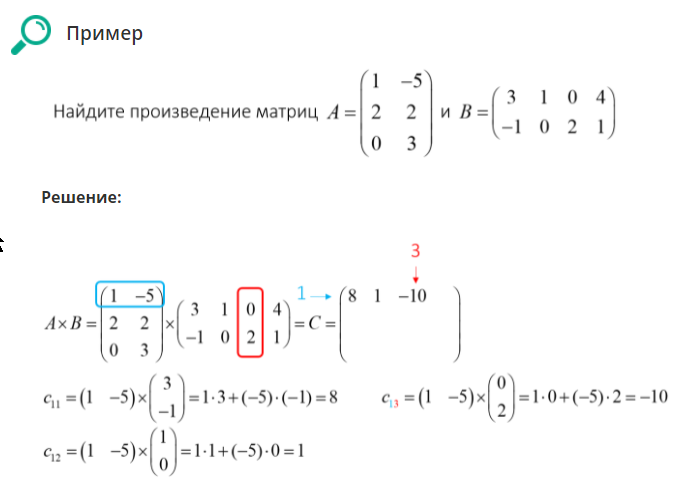

> Операция умножения двух матриц возможна только в том случае, если число столбцов в первой матрице равно числу строк во второй.

__Размер итоговой матрицы__

Если матрица A содержит m строк, а матрица B содержит n столбцов, то результатом их умножения будет матрица С размера  m × n.

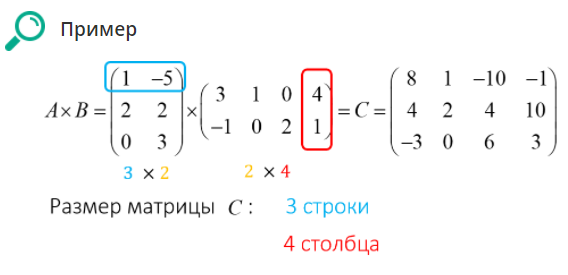

> Умножение матриц __некоммутативно__, то есть  AB ≠ BA.

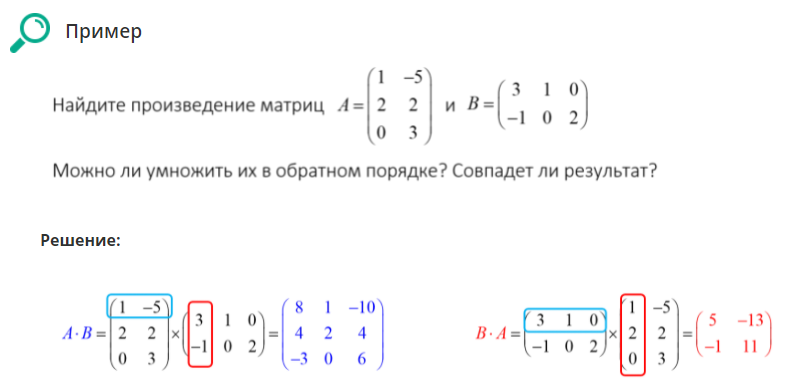

__Ответ__: результаты умножения не только отличаются численно, но и имеют разный размер.

__В Python__

В Python матрицы можно умножить командой __np.dot__. При перемене мест сомножителей результат также меняется.

In [179]:
A = np.matrix('1,-5;2,2;0,3')
B = np.matrix('3,1,0;-1,0,2')

In [180]:
A

matrix([[ 1, -5],
        [ 2,  2],
        [ 0,  3]])

In [181]:
B

matrix([[ 3,  1,  0],
        [-1,  0,  2]])

In [182]:
np.dot(A,B)

matrix([[  8,   1, -10],
        [  4,   2,   4],
        [ -3,   0,   6]])

In [183]:
np.dot(B,A)

matrix([[  5, -13],
        [ -1,  11]])

__Умножение вектора и матрицы__

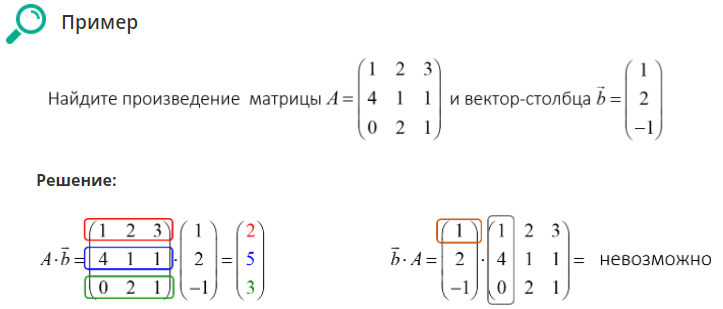

> Умножать на столбец можно только справа.

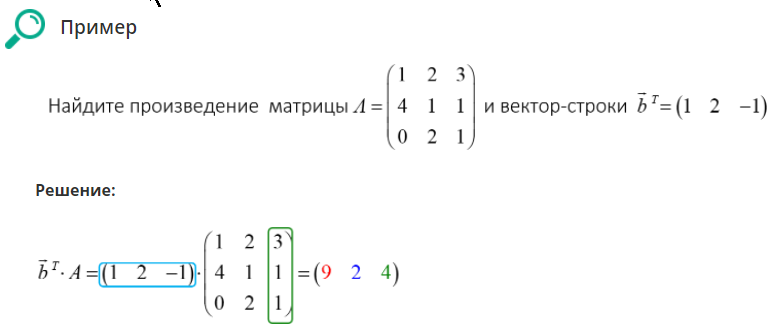

> Умножать вектор-строку на матрицу можно только слева.

__Тензорное произведение векторов__

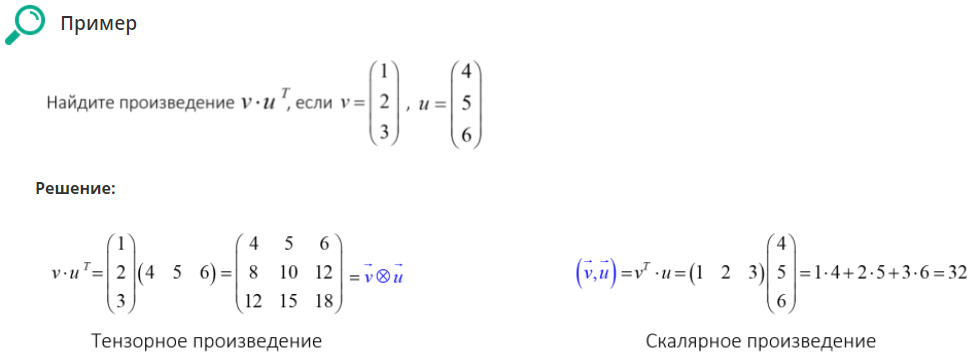

__Общие правила матриц__

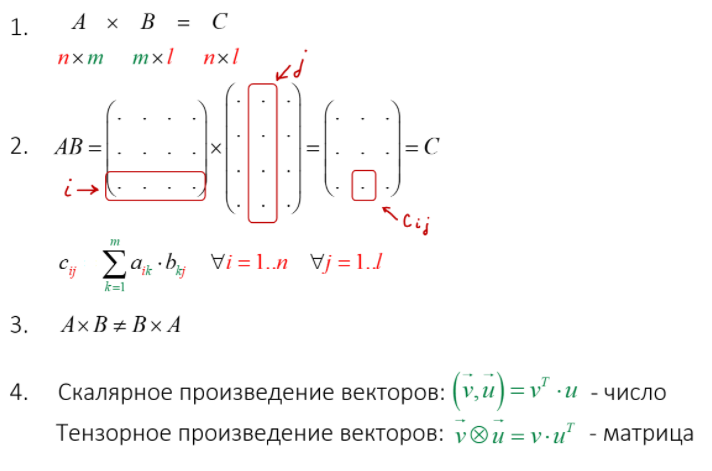

__Задания__

> *Задача 1*

In [184]:
A = np.matrix('1,-1,2,4,0;8,2,0,5,3;0,1,2,1,2')
B = np.matrix('1,0,1,0;0,0,2,-1;1,0,1,1;0,1,1,1;1,1,0,-1')

In [185]:
C = A*B

In [186]:
C[0,1]

4

In [187]:
C[2,3]

0

> *Задача 2*

In [188]:
a = np.array([1,3])
b = np.array([-3,1])
a = np.reshape(a,(2,1))

In [189]:
a*b

array([[-3,  1],
       [-9,  3]])

[К содержанию](#1)

---

###  Умножение на специальные матрицы<a name="12"></a>

__Умножение на нулевую матрицу__

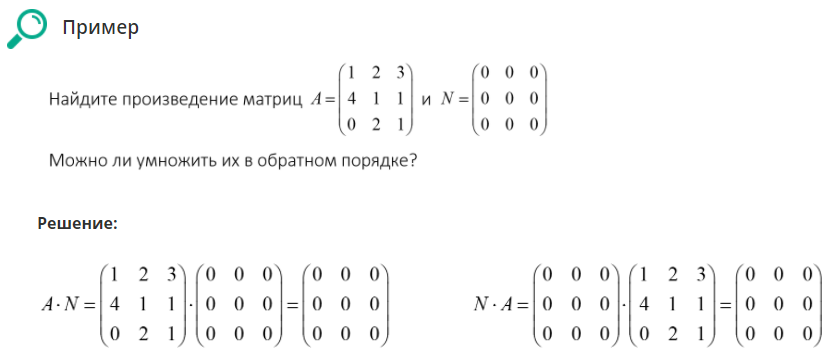

> Нулевая матрица играет роль нуля не только в сложении, но в умножении матриц (независимо от порядка).

__Умножение на единичную и шаровую матрицу__

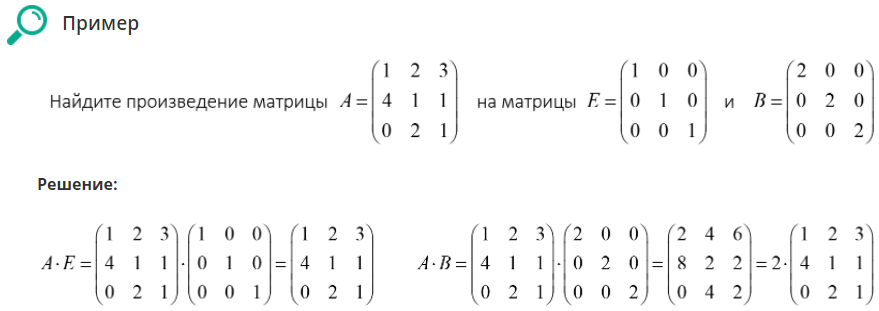

>  Единичная матрица играет роль единицы: при умножении на неё ничего не меняется. При умножении на шаровую матрицу каждый элемент матрицы A умножился на 2, что равносильно умножению матрицы A на число 2.

> Единичная и шаровая матрицы перестановочны с любой квадратной матрицей, результат не зависит от порядка умножения.

__Умножение на диагональную матрицу__

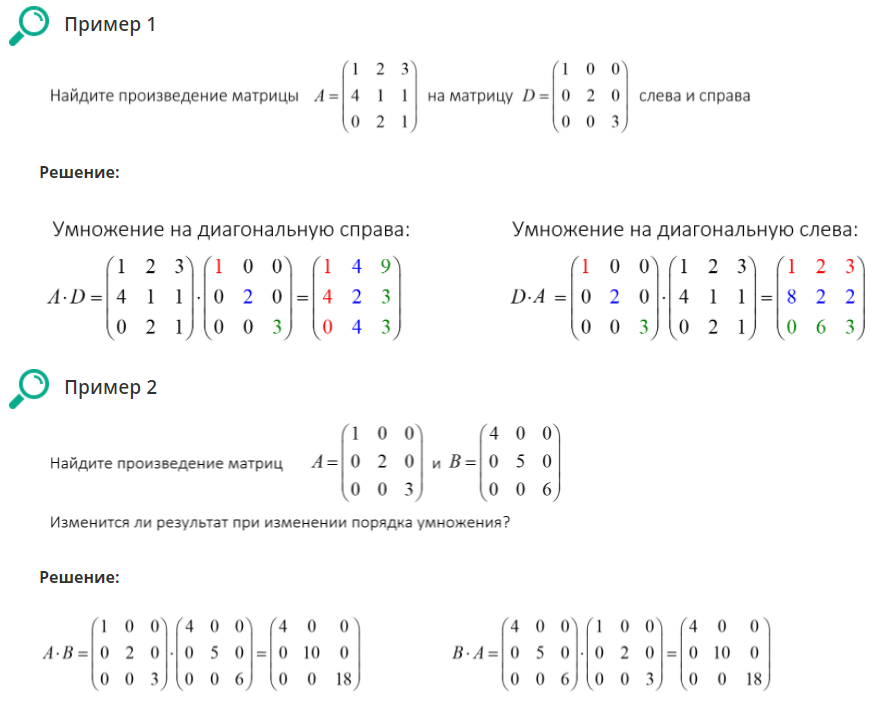

> Диагональные матрицы неперестановочны с другими в общем случае. Но перестановочны между собой. Это их свойство будет активно использоваться при работе с матрицами ковариаций многомерных нормальных распределений.

__Резюме: умножение на специальные матрицы__

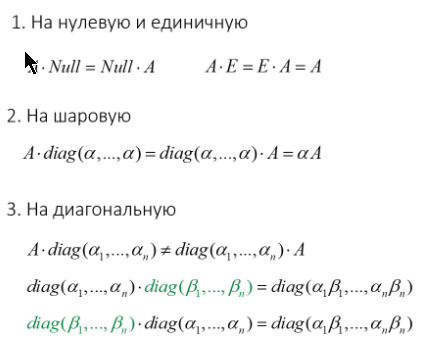

> Нулевая и единичная матрица играют роль нуля и единицы в матричном умножении.

> Умножение на шаровую матрицу — то же самое, что умножение на скаляр.

>  Умножение на диагональную матрицу даёт растяжение каждого столбца или строки в зависимости от порядка.

> Диагональные матрицы коммутируют между собой.

__Задания__

In [190]:
A = np.matrix('2,0;0,3')
B = np.matrix('1,1;4,5')

In [191]:
A*B

matrix([[ 2,  2],
        [12, 15]])

In [192]:
B*A

matrix([[ 2,  3],
        [ 8, 15]])

[К содержанию](#1)

---

###  Делители нуля<a name="13"></a>

*Определение*: __Делители нуля__ — это специальные ненулевые элементы, которые дают ноль при умножении.

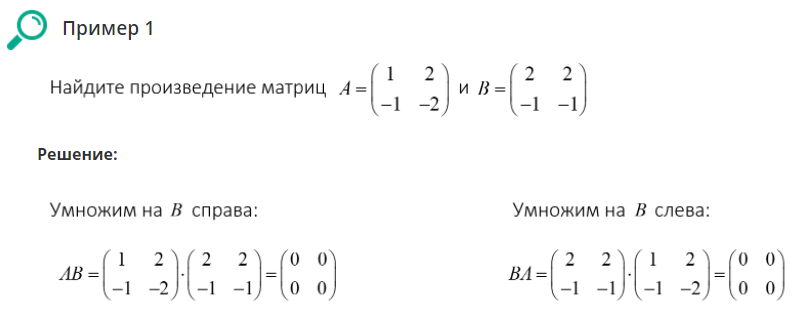

> Матрицы А и В — примеры делителей нуля.

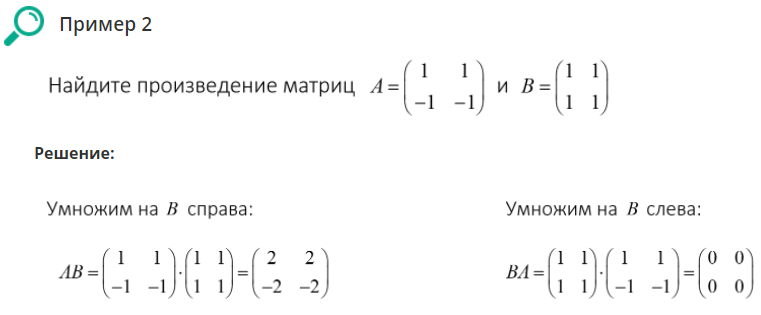

> Во втором примере матрицы А и В — тоже делители нуля.

> Если матрицы А и В — делители нуля, то строки левого сомножителя ортогональны столбцам правого.

[К содержанию](#1)

---

###  Умножение и транспонирование матриц<a name="14"></a>

> При транспонировании меняется порядок произведения:

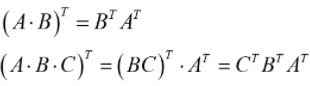

__Матрица Грама__

> Матрицей Грама системы векторов называется матрица, составленная из их скалярных произведений.

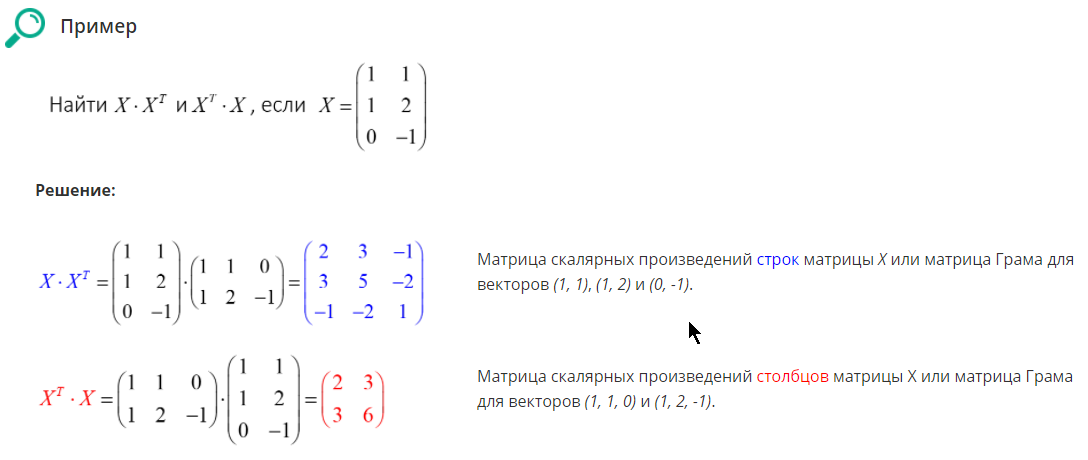

> Матрицы Х и ХТ можно умножать в любом порядке. В обоих случаях получится симметричная квадратная матрица.

__Задания__

> _Задача 1_

In [193]:
G = np.matrix('1,1;2,-1;1,2')

In [194]:
G*G.T

matrix([[2, 1, 3],
        [1, 5, 0],
        [3, 0, 5]])

[К содержанию](#1)

---

###  Практика. Умножение матриц<a name="15"></a>

In [195]:
# произведение матриц
A=np.random.randint(5, 12, (3,3))
B=np.random.randint(-2, 4, (3,3))

In [196]:
A

array([[7, 7, 5],
       [9, 8, 8],
       [5, 5, 5]])

In [197]:
B

array([[ 0,  2, -2],
       [ 3,  0,  1],
       [ 0,  3, -1]])

In [198]:
# Поэлементное умножение
A*B

array([[  0,  14, -10],
       [ 27,   0,   8],
       [  0,  15,  -5]])

In [199]:
# тип np.matrix
A_m=np.matrix(A)
B_m=np.matrix(B)
print(A_m*B_m)

[[ 21  29 -12]
 [ 24  42 -18]
 [ 15  25 -10]]


In [200]:
# Матричное умножение в ndarrays
np.dot(A,B)

array([[ 21,  29, -12],
       [ 24,  42, -18],
       [ 15,  25, -10]])

In [201]:
# Матричное умножение
A@B

array([[ 21,  29, -12],
       [ 24,  42, -18],
       [ 15,  25, -10]])

In [202]:
# Порядок умножения AB != BA
B@A

array([[ 8,  6,  6],
       [26, 26, 20],
       [22, 19, 19]])

In [203]:
# Умножение прямоугольных матриц возможно не в любом порядке
A=np.random.randint(5, 12, (3,5))
B=np.random.randint(-2, 4, (5,2))
print('A:\n',A)
print('B:\n',B)

A:
 [[ 8 11 10  9 10]
 [ 6  6  8  5  7]
 [11  7  7  5  5]]
B:
 [[ 3  2]
 [-2  2]
 [ 2  3]
 [ 0  1]
 [-2  1]]


In [204]:
# Умножение прямоугольных матриц возможно не в любом порядке
A@B

array([[ 2, 87],
       [ 8, 60],
       [23, 67]])

In [205]:
# Умножение прямоугольных матриц возможно не в любом порядке
B@A

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [ ]:
# размер произведения матриц
print('shape of A:', np.shape(A))
print('shape of B:', np.shape(B))
print('shape of AB:', np.shape(A@B))

In [ ]:
# умножение на специальные матрицы
A=np.random.randint(-4, 4, (4,4))
D=np.diag([1,2,0,-1])
print('A:\n',A)
print('D:\n',D)
print('AD:\n',A@D)
print('DA:\n',D@A)

In [ ]:
# умножение на одномерный массив numpy
A=np.array([[1,0,1],[1,1,1]])
b=np.array([-3,4,5])
A@b

In [ ]:
b@A

In [ ]:
# матрица Грама ортогональной системы векторов
x=np.array([1,1,1])
y=np.array([1,0,-1])
z=np.array([-1,2,-1])
A=np.array([x,y,z])
print (A, type(A))

In [ ]:
# матрица Грама ортогональной системы векторов
A@A.T

In [ ]:
# матрица Грама ортонормированной системы векторов
x_norm=x/np.linalg.norm(x)
y_norm=y/np.linalg.norm(y)
z_norm=z/np.linalg.norm(z)
A_norm=np.array([x_norm,y_norm,z_norm])
print (A_norm, type(A_norm))

In [ ]:
# матрица Грама ортонормированной системы векторов
A_norm@A_norm.T

In [ ]:
# ортонормированные системы рулят! :)
np.round(A_norm@A_norm.T,1)

__Задачи__

> *Задача 1*

In [ ]:
A = np.array([[5,-1,3,1,2], [-2,8,5,-1,1]])
x = np.array([1,2,3,4,5])

Найдите произведение матрицы A и вектора x в том порядке, в котором их можно умножить.

In [ ]:
A@x

In [ ]:
x@A

> *Задача 2*

In [ ]:
A = np.array([[1,9,8,5], [3,6,3,2], [3,3,3,3], [0,2,5,9], [4,4,1,2]])
B = np.array([[1,-1,0,1,1], [-2,0,2,-1,1]])

Найдите произведение матриц A и B в том порядке, в котором их можно умножить.

In [ ]:
A@B

In [ ]:
B@A

> *Задача 3*

In [ ]:
x = np.array([1,2,1,0,4])
y = np.array([2,1,-1,1,0])
z = np.array([-1,1,-1,0,0])

Найдите матрицу Грама системы векторов x, y, z

In [ ]:
A=np.array([x,y,z])

In [ ]:
A@A.T

> *Задача 4*

In [ ]:
#В dataframe Count_DF содержится информация по количеству услуг, оказанных каждым стилистом за апрель.
Count_DF = pd.DataFrame({'Женские стрижки': [10, 2, 12, 4, 6, 10, 22, 7], 
                                'Мужские стрижки': [5, 21, 12, 8, 25, 3, 1, 0], 
                                'Окрашивания':[12, 3, 0, 18, 27, 2, 4, 31],
                              'Укладка':[15, 25, 30, 14, 25, 17, 25, 31],
                                'Уход':[10, 6, 4, 5, 18, 12, 20, 28]
                                }, 
                               index=['Аня', 'Борис', 'Вика', 'Галя', 'Дима', 'Егор', 'Женя','Юра'])

In [ ]:
#В dataframe Price_DF содержится информация по стоимости услуг у каждого стилиста в тысячах рублей.
Price_DF = pd.DataFrame({'Женские стрижки': [2, 1.8, 2, 1.8, 2.5, 5, 1.1, 4.5], 
                                'Мужские стрижки': [1.5, 2.5, 2, 1.2, 3.5, 5, 1, 4], 
                                'Окрашивания':[1, 1, 0, 2.8, 2, 3, 1.5, 2.5],
                              'Укладка':[0.8, 1, 0.5, 0.8, 1, 2, 0.5, 1],
                                'Уход':[1, 1, 2, 2, 1.5, 2.5, 1.7, 2] 
                                }, 
                               index=['Аня', 'Борис', 'Вика', 'Галя', 'Дима', 'Егор', 'Женя','Юра'])

In [ ]:
C = Count_DF.values
P = Price_DF.values

In [ ]:
C

In [ ]:
P

Найдите вектор выручки Бориса.

In [ ]:
V = C*P

In [ ]:
V

In [ ]:
V[1]

Найдите вектор прибыли салона по стилистам, если за каждую услугу стилисты платят определенную комиссию салону.

In [ ]:
# Вектор комиссий
com = [0.2, 0.2, 0.3, 0.1, 0.1]

In [ ]:
V@com

Найдите вектор прибыли стилистов.

In [ ]:
V@(np.ones(5)-com)

[К содержанию](#1)

---

### Обратная матрица<a name="16"></a>

В числах деление — это умножение на обратное число

> __Обратным__ к числу а называется такое число a -1, которое в произведении с a даст единицу

Обратные  есть у всех чисел, кроме нуля.

> Свойство: обратное число всегда одно и неважно, с какой стороны умножать на него.

Перед нами встаёт задача научиться подбирать такую матрицу, которая даст в произведении с исходной единичную.

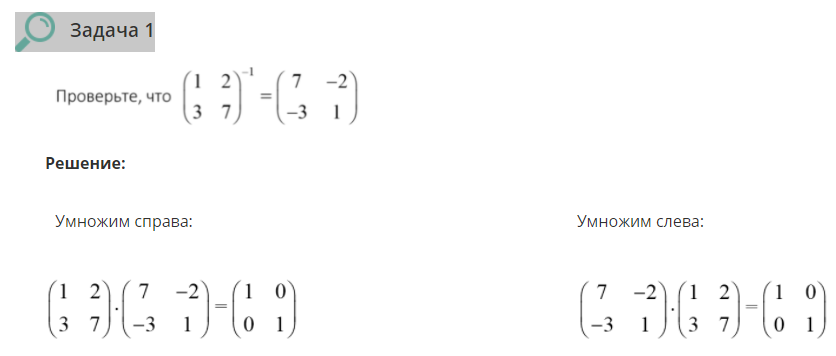

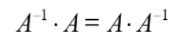

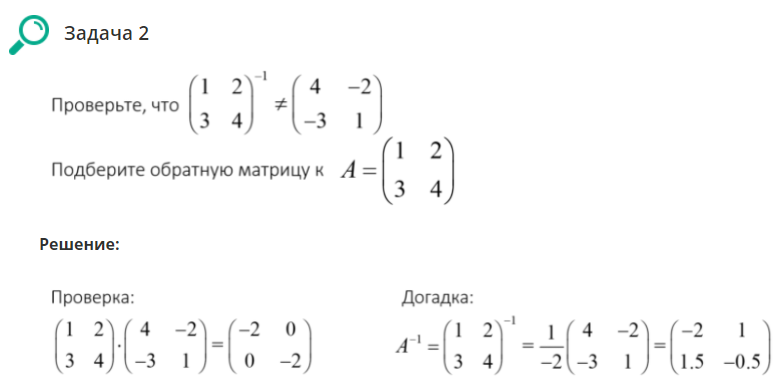

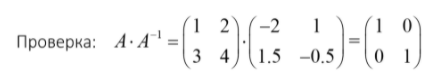

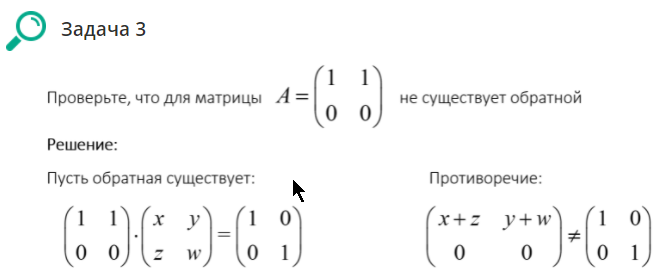

> Для случая размерности 2 × 2 обратная матрица считается очень просто:

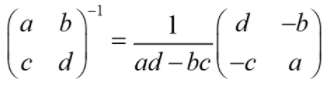

Обратная матрица размерности 2 × 2 существует, если

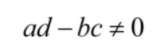

__В Python__

Обратная матрица в *Python* вычисляется с помощью команды __linalg.inv__

In [ ]:
A = np.matrix('1,2,3;4,5,6;7,8,10')

In [ ]:
A

In [ ]:
OA = np.linalg.inv(A)

In [ ]:
OA

In [ ]:
np.round(A*OA)

__Задания__

In [ ]:
A = np.matrix('1,2;2,5')

In [ ]:
np.linalg.inv(A)

[К содержанию](#1)

---

### Определитель матрицы<a name="17"></a>

*Определение*: __Определитель матрицы__ — это число, специальная числовая характеристика квадратных матриц, которая является своего рода мерой вырожденности матрицы и для размерности 2 × 2 вычисляется по следующему правилу:

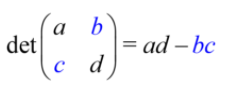

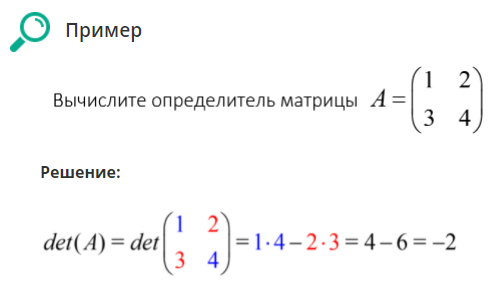

__В Python__

В *Python* определитель считается командой __linalg.det__ из библиотеки __numpy__

In [ ]:
A = np.matrix('1,2,3;4,5,6;7,8,10')

In [ ]:
A

In [ ]:
np.linalg.det(A)

__Свойства определителя__

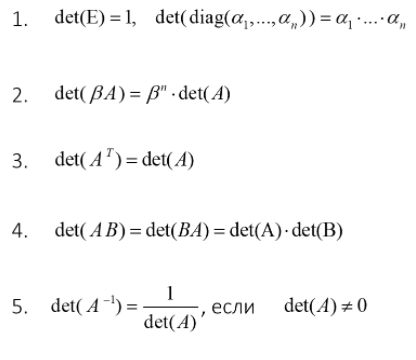

__Вырожденность матрицы__

*Определение*: Матрицы с нулевым определителем называются __вырожденными__.

Если __det (A) = 0__, то:

> матрица А вырожденная;

> у матрицы А не существует обратной;

> столбцы и строки матрицы А линейно зависимы.

__Задания__

In [ ]:
A = np.matrix('2,0,0;0,1,0;0,0,4')

In [ ]:
np.linalg.det(A)

In [ ]:
np.linalg.inv(A)

In [ ]:
0.5*0.25

[К содержанию](#1)

---

### Линейная (не)зависимость<a name="18"></a>

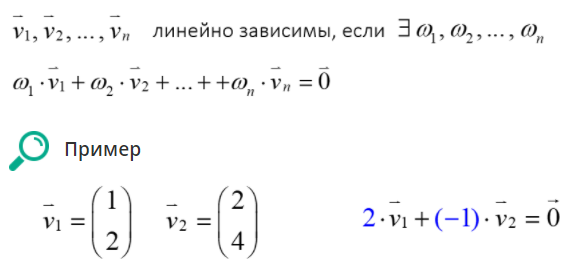

Векторы очевидно линейно зависимы, т.к. один из них пропорционален другому. Нам достаточно взять коэффициенты 2 и -1, чтобы получить нулевую комбинацию.

__Как определить при помощи однородных СЛАУ, являются ли векторы линейно зависимыми__

__СЛАУ__ — система линейных алгебраических уравнений.

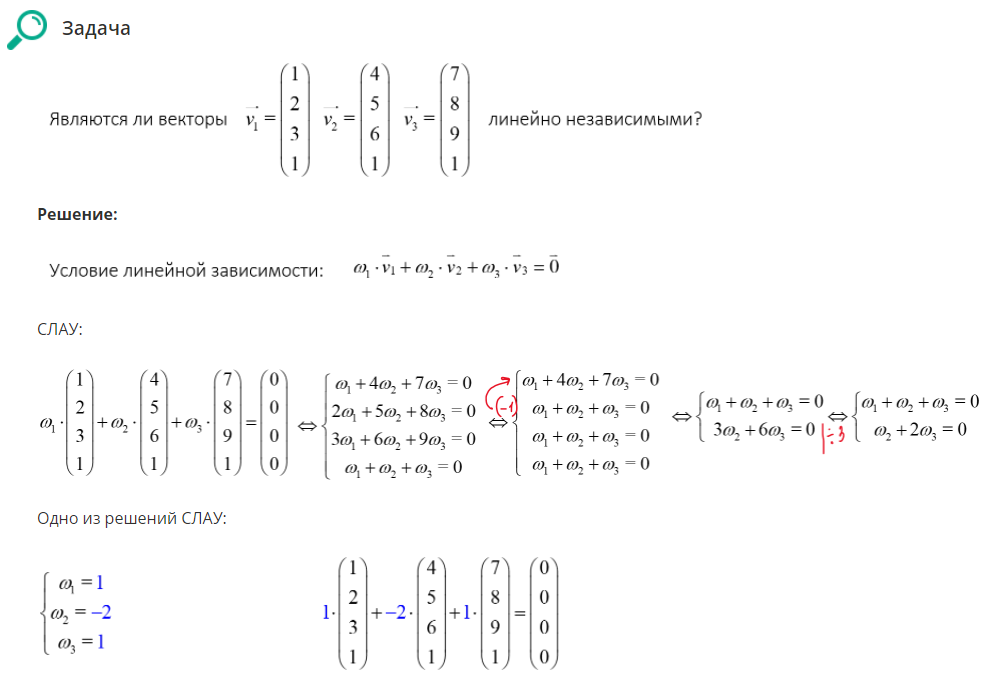

Запись системы в матричном виде:

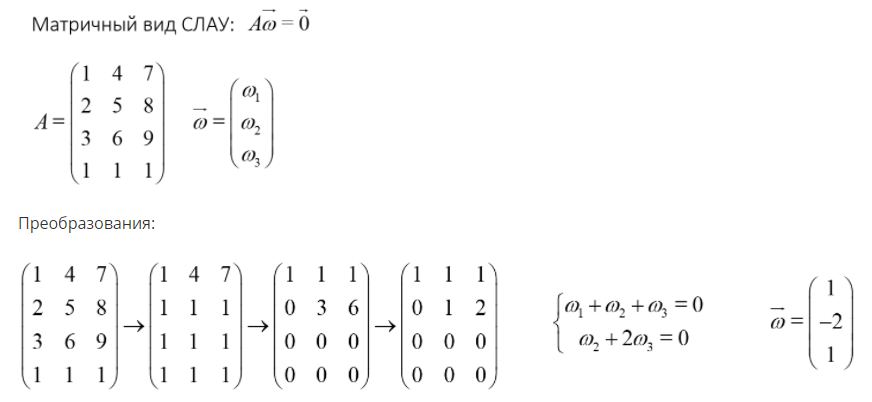

__Метод определения линейной зависимости/независимости при помощи СЛАУ:__

1. Записать СЛАУ в матричном виде и решить ее.
2. Есть ненулевые решения — векторы линейно зависимы.
3. Нет ненулевых решений — векторы линейно независимы.

__Как определить при помощи ранга, являются ли векторы линейно зависимыми__

*Определение*: __Ранг матрицы__ — количество линейно независимых столбцов.

*Определение*: __Ранг системы векторов__ — размерность этой системы. 

__Чтобы исследовать систему векторов на линейную зависимость / независимость с помощью ранга__, достаточно записать эти векторы в матрицу по столбцам и найти ранг полученной матрицы. Ранг будет равен количеству линейно независимых векторов в системе.

*Определение*: __Базис__ — максимальная линейно независимая подсистема векторов.

В системе векторов можно выбрать ровно столько линейно независимых векторов, какой у нее ранг.

*Определение*: __Базис матрицы__ — максимальная линейно независимая подсистема столбцов матрицы.

Базисов может быть несколько.

__В Python__

Для вычисления ранга матриц в библиотеке numpy есть команда __linalg.matrix_rank__

In [ ]:
v1=np.array([1,2,3,1])
v2=np.array([4,5,6,1])
v3=np.array([7,8,9,1])
A=np.array([v1,v2,v3]).T

In [ ]:
A

In [ ]:
np.linalg.matrix_rank(A)

__Свойства ранга__

1. Если  А — прямоугольная матрица размера m × k, то __rk(A) ≤ min(m, k)__.
2. Если __rk(A) = min(m, k)__, то А —матрица максимального ранга.
3. Квадратная матрица А размера n × n обратима, если:
 * det(A) ≠ 0
 * столбцы (или строки) матрицы А линейно независимы 
 * rk(A) = n
4. Квадратная матрица А размера n × n вырождена, если:
 * rk(A) < n
 * Чем меньше rk(A), тем более вырождена A

> Для успешного построения регрессий необходимо научиться избавляться от линейной зависимости.

__Задания__

In [ ]:
v1=np.array([4,1,0])
v2=np.array([-1,4,0])
v3=np.array([0,0,1])
A=np.array([v1,v2,v3]).T

In [ ]:
np.linalg.matrix_rank(A)

[К содержанию](#1)

---

### Практика. Обратная матрица, ранг, определитель<a name="19"></a>

In [ ]:
# обратная матрица - все ок
A1=np.array([[1,2,3],[4,5,6],[7,8,10]])
print('A1:\n',A1)

In [ ]:
print('rk(A3):\n',np.linalg.matrix_rank(A1))

In [ ]:
# обратная матрица - все ок
A1_inv=np.linalg.inv(A1)
print('A1 inversed:\n',A1_inv)


In [ ]:
# обратная матрица - все ок
print('A1 @ A1 inversed=E check:\n',A1@A1_inv,1)
print(np.round(A1@A1_inv,1))
print('check OK')

In [ ]:
# обратная матрица - вырожденный случай
A2=np.array([[1,2,3],[4,5,6],[1,2,3]])
print('A2:\n',A2)

In [ ]:
# обратная матрица - вырожденный случай
print('rk(A3):\n',np.linalg.matrix_rank(A2))

In [ ]:
# обратная матрица - вырожденный случай
np.linalg.inv(A2)

In [ ]:
# обратная матрица - magic
A3=np.array([[1,2,3],[4,5,6],[7,8,9]])
print('A3:\n',A3)

In [ ]:
# обратная матрица - magic
print('rk(A3):\n',np.linalg.matrix_rank(A3))

In [ ]:
# обратная матрица - magic
print('A3 inversed:\n',np.linalg.inv(A3))

In [ ]:
# обратная матрица - magic
print('A3 @ A3 inversed = E check:\n',A3@np.linalg.inv(A3))
print('check failed')

In [ ]:
print('det(A1)):\n',np.linalg.det(A1))

In [ ]:
print('det(A2)):\n',np.linalg.det(A2))

In [ ]:
print('det(A3)):\n',np.linalg.det(A3))

In [ ]:
# обратная матрица - неустойчивость
A4=np.array([[1,2,3],[4,5,6],[1,2,3.00005]])
print('A4:\n',A4)
print('rk(A4):\n',np.linalg.matrix_rank(A4))
print('det(A4):\n',np.linalg.det(A4))
print('A4 inverse:\n',np.linalg.inv(A4))

In [ ]:
# обратная матрица - неустойчивость вблизи нулевого определителя
A5=np.array([[1,2,3],[4,5,6],[1,2,3.00000005]])
print('A5:\n',A5)
print('rk(A5):\n',np.linalg.matrix_rank(A5))
print('det(A5):\n',np.linalg.det(A5))
print('A5 inverse:\n',np.linalg.inv(A5))

In [ ]:
# обратимость матрицы Грама линейно независимой системы векторов
v1=np.array([1,2,1])
v2=np.array([1,1,1])
A=np.array([v1,v2]).T
print('A:\n',A)
print('Матрица Грама:\n',A.T@A)

In [ ]:
print('Ранг матрицы Грама:\n',np.linalg.matrix_rank(A.T@A))

In [ ]:
print('Определитель матрицы Грама:\n',np.linalg.det(A.T@A))

In [ ]:
print('Обратная к матрице Грама:\n',np.linalg.inv(A.T@A))

__Задания__

> *Задача 1*

In [ ]:
A = np.array([[8, 6, 11], [7, 5, 9],[6, 10, 6]])

Найдите обратную матрицу к матрице А.

In [ ]:
np.round(np.linalg.inv(A), 3)

> *Задача 2*

In [ ]:
v1 = np.array([9, 10, 7, 7, 9])
v2 = np.array([2, 0, 5, 1, 4])
v3 = np.array([4, 0, 0, 4, 1])
v4 = np.array([3, -4, 3, -1, -4])

Найдите ранг системы векторов v1, v2, v3, v4.

In [ ]:
A=np.array([v1,v2,v3,v4]).T

In [ ]:
np.linalg.matrix_rank(A)

Найдите матрицу Грама системы векторов v1, v2, v3, v4.

In [ ]:
A.T@A

Найдите определитель матрицы Грама системы v1, v2, v3, v4.

In [ ]:
np.linalg.det(A.T@A)

Найдите обратную матрицу к матрице Грама системы v1, v2, v3, v4.

In [ ]:
np.round(np.linalg.inv(A.T@A), 3)

[К содержанию](#1)